In [1]:
import pandas as pd
import math
import pandas as pd
import seaborn as sns
import os
import re
import random
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

from scipy.fft import fft, ifft

In [2]:
data_folder = "output/sessions_data/"
files = next(os.walk(data_folder), (None, None, []))[2]
paths = [data_folder + f for f in files]

In [3]:
paths

['output/sessions_data/session_2021-11-14_21-05.csv',
 'output/sessions_data/session_2021-11-20_19-26.csv',
 'output/sessions_data/session_2021-11-23_19-00.csv',
 'output/sessions_data/session_2021-12-06_19-38.csv',
 'output/sessions_data/session_2021-12-12_18-46.csv']

In [11]:
list_of_df = []
for i, path in enumerate(paths):
    df_temp = pd.read_csv(path)
    df_temp['session'] = i
    #df_temp['date_time'] = datetime.strptime(re.findall(r"session_(.*).csv",path)[0], '%Y-%m-%d_%H-%M')
    list_of_df.append(df_temp)
df = pd.concat(list_of_df)
df.body_y_landmark = 1 - df.body_y_landmark

In [12]:
df.head()

elapsed_time  body_x_landmark  body_y_landmark  between_hands_x_landmark  \
0      0.118683         0.287090         0.787016                  0.244959   
1      0.073804         0.273767         0.768734                  0.256377   
2      0.075796         0.273529         0.754022                  0.258517   
3      0.063830         0.264375         0.752155                  0.255416   
4      0.069813         0.269460         0.755490                  0.259673   

   between_hands_y_landmark  classif_logit            date_time  session  
0                  0.447016       0.412139  2021-11-14 21:05:00        0  
1                  0.503652       0.386254  2021-11-14 21:05:00        0  
2                  0.590531       0.385041  2021-11-14 21:05:00        0  
3                  0.578075       0.394502  2021-11-14 21:05:00        0  
4                  0.584002       0.414315  2021-11-14 21:05:00        0

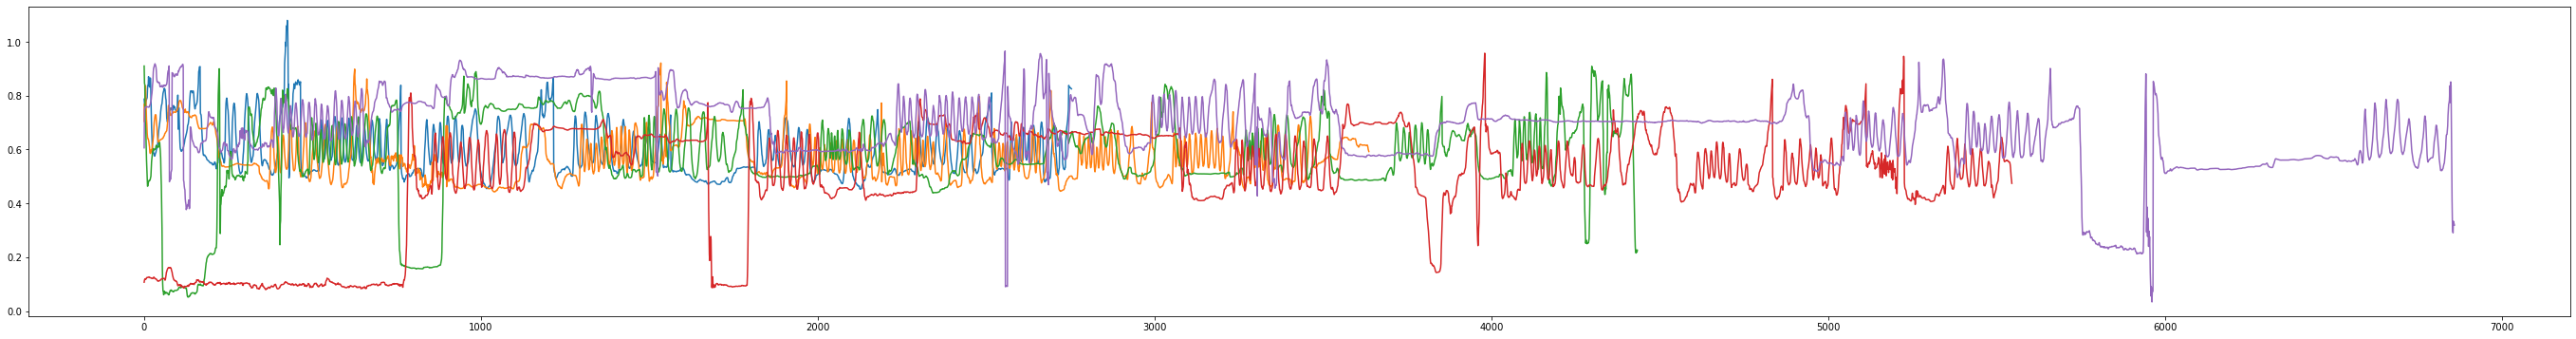

In [6]:
for i in df.session.unique():
    df.loc[(df.classif_logit>0) & (df.session == i)].body_y_landmark.plot(figsize=(48,6))

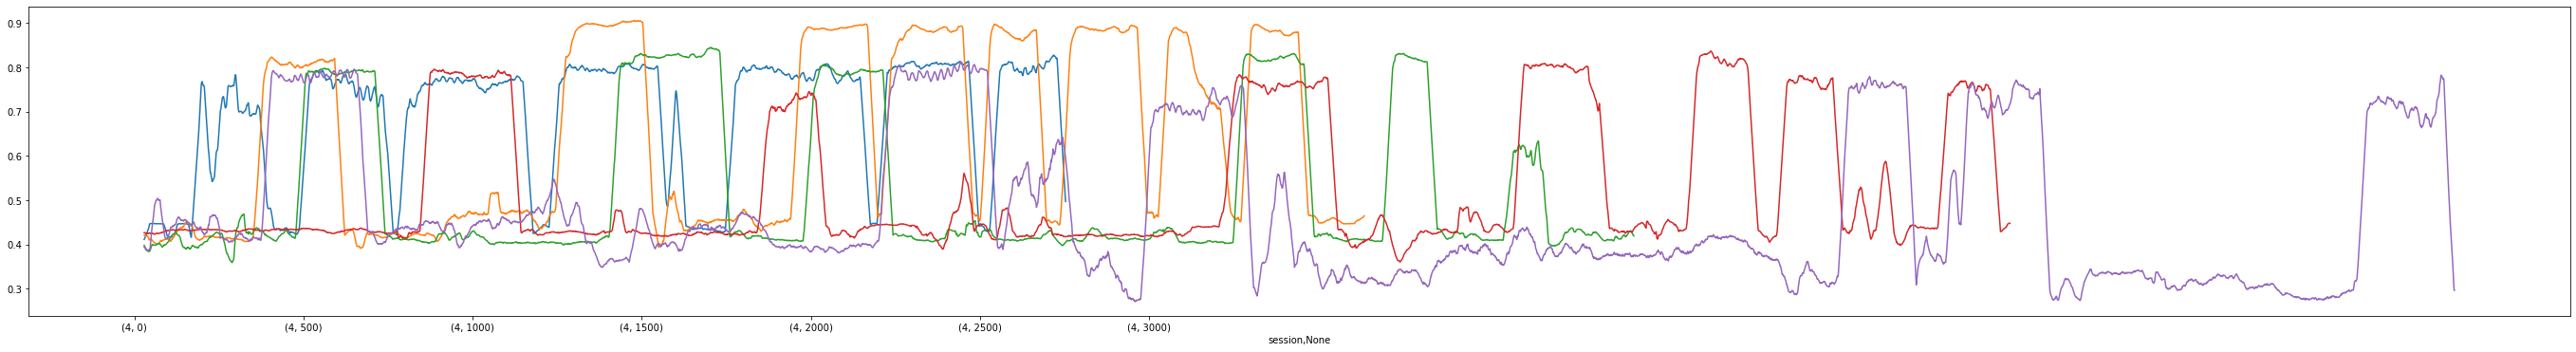

In [7]:
for i in df.session.unique():
    df.loc[df.session == i].groupby(['session'])['classif_logit'].rolling(30).mean().plot(figsize=(48,6))

In [8]:
df['classif_logit_smoothed'] = df.groupby(['session'])['classif_logit'].rolling(window=60, center=True).mean().reset_index(0,drop=True)
df['session_time'] = df.groupby(['session'])['elapsed_time'].cumsum()

0
1
2
3
4


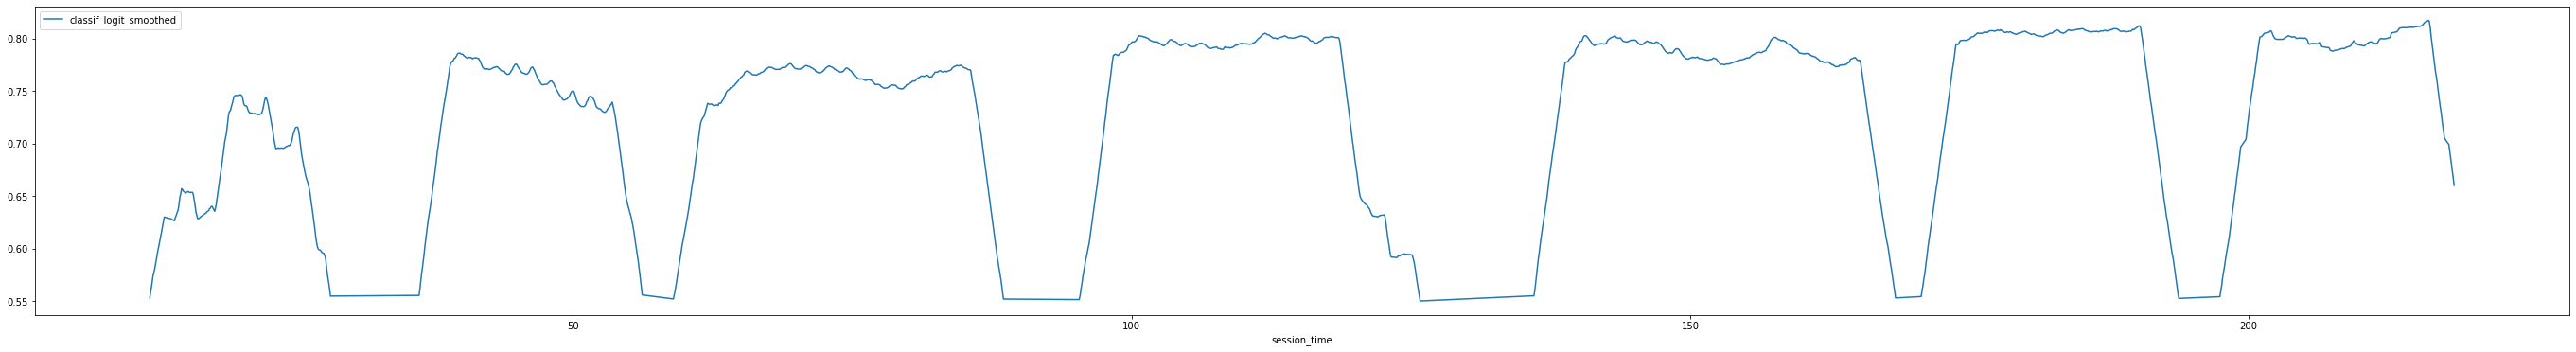

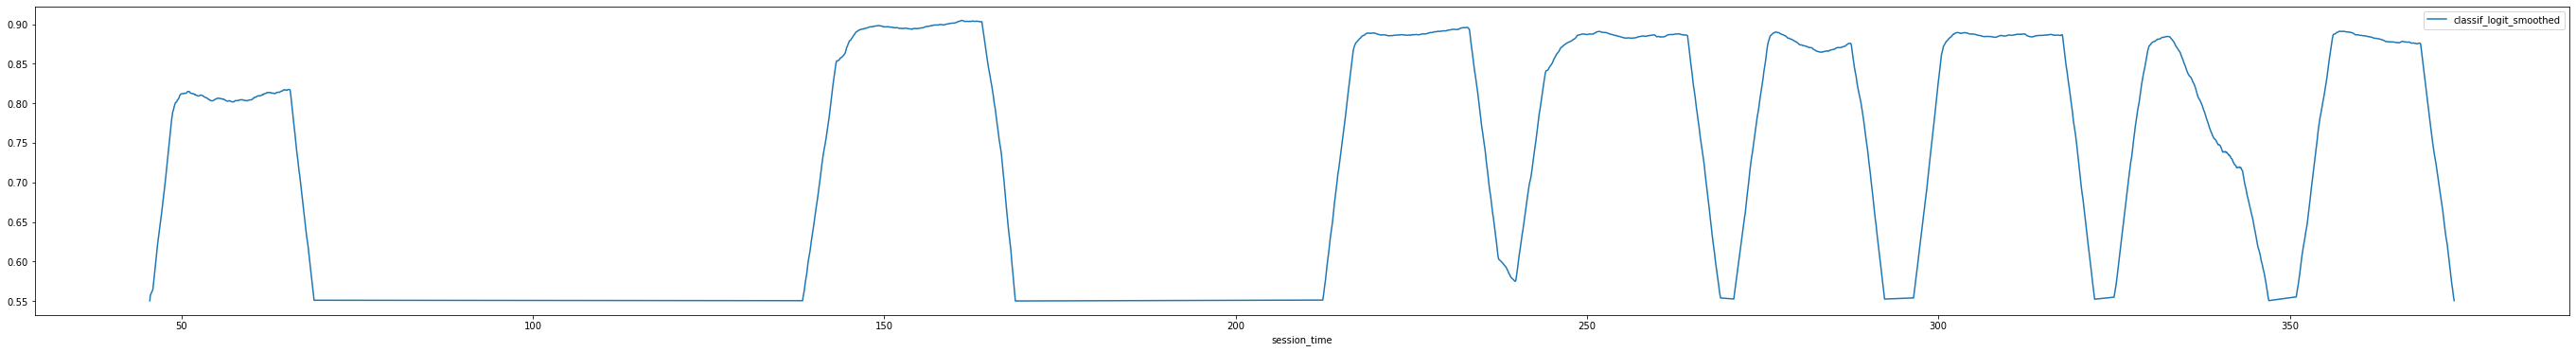

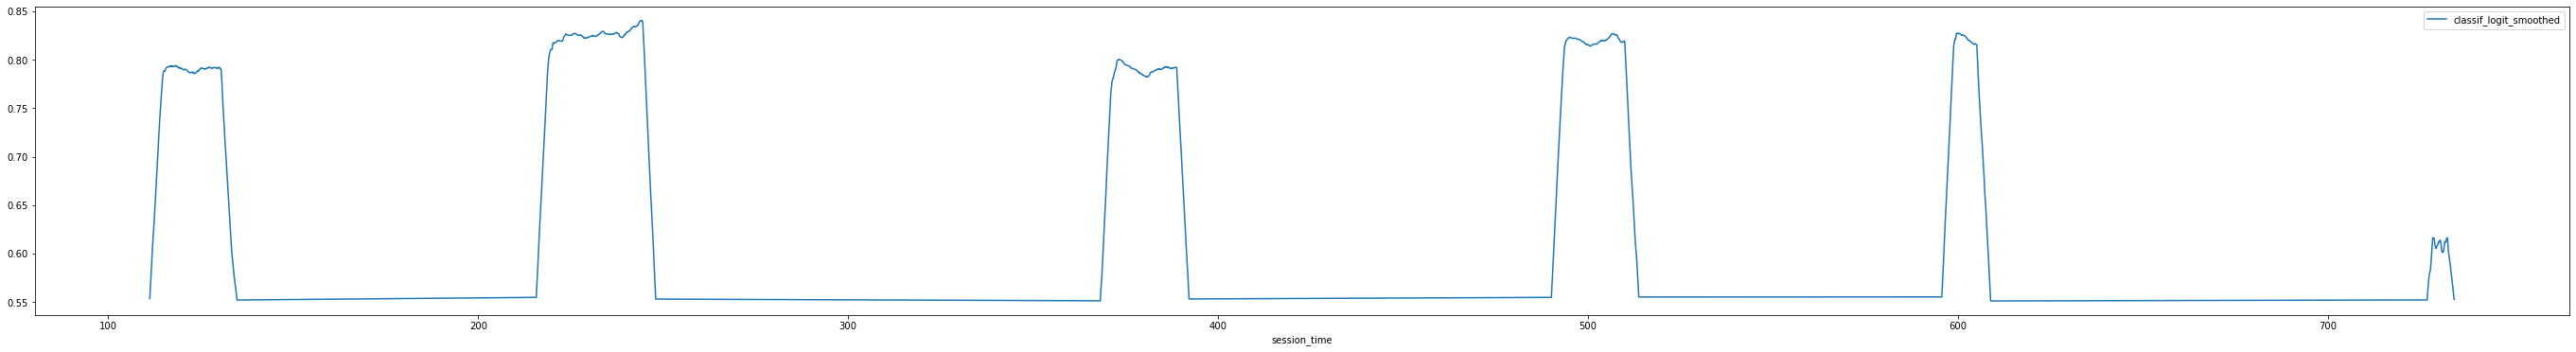

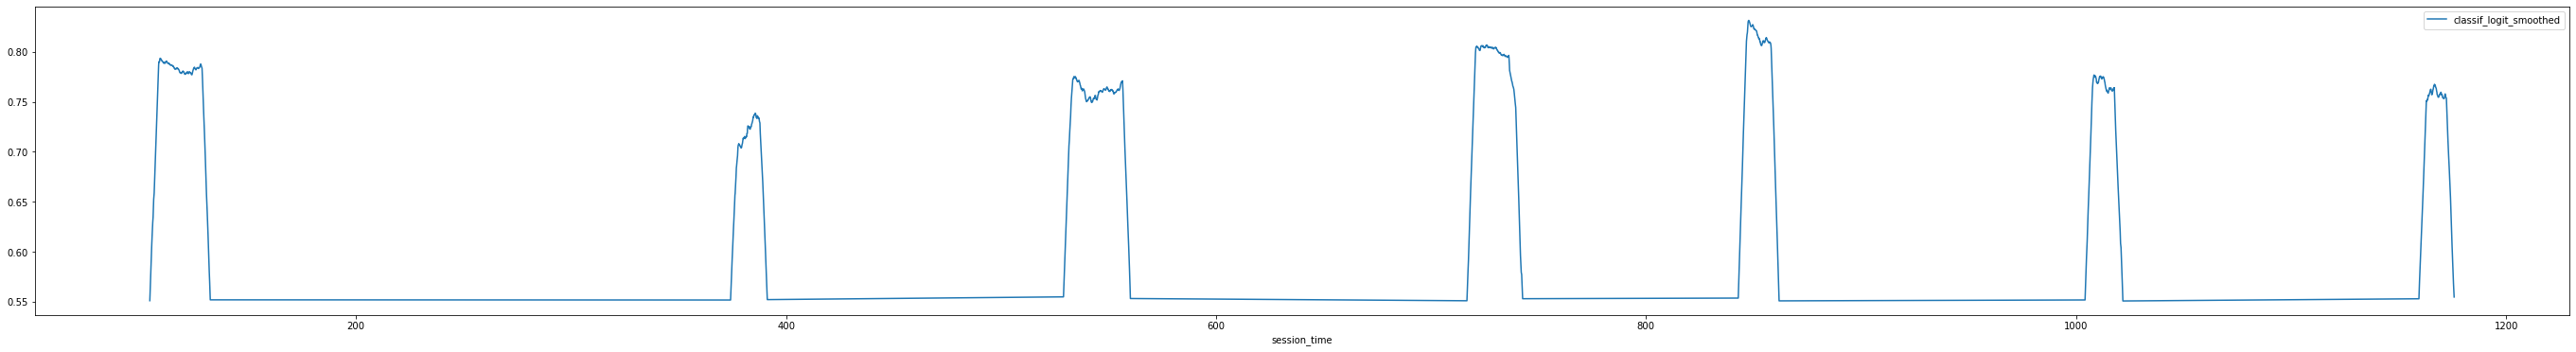

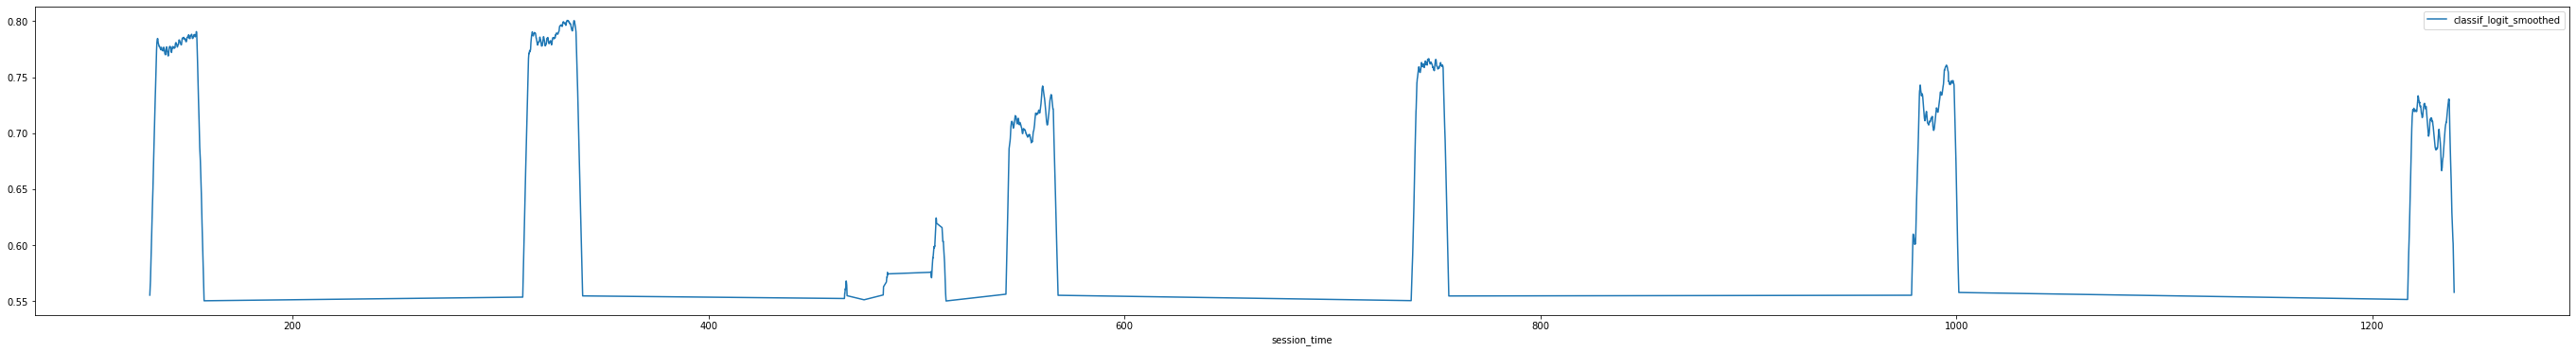

In [9]:
for i in df.session.unique():
    print(i)
    df.loc[(df.classif_logit_smoothed>0.55) & (df.session == i)].plot(x='session_time', y='classif_logit_smoothed', figsize=(48,6))

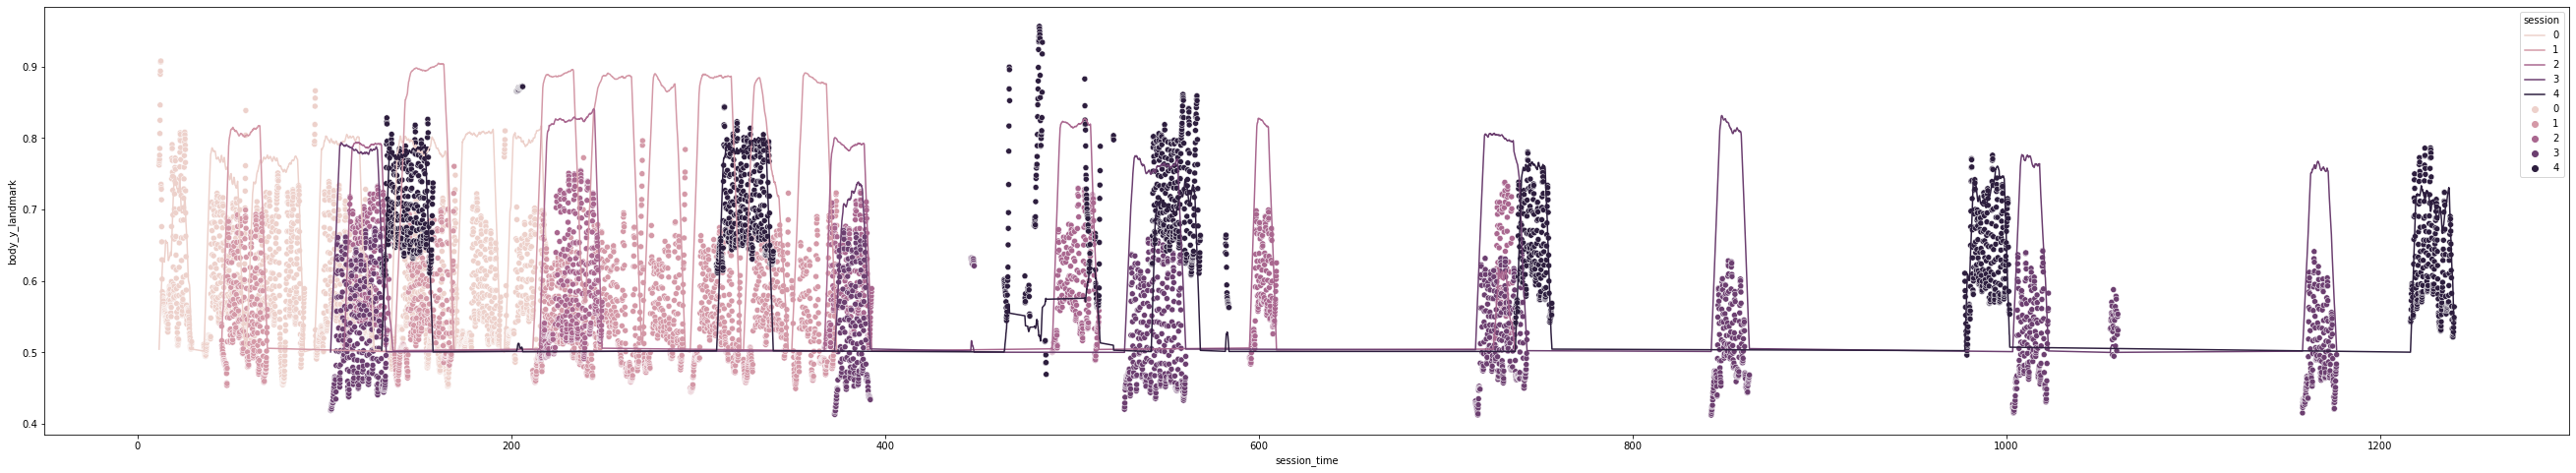

In [10]:
plt.figure(figsize=(46,8))
sns.color_palette('bright')
sns.scatterplot(data=df[(df.classif_logit_smoothed>0.5)], x='session_time', y='body_y_landmark', hue='session')
sns.lineplot(data=df[(df.classif_logit_smoothed>0.5)], x='session_time', y='classif_logit_smoothed', hue='session')
plt.show()

In [11]:
"""
tresh = 0.5
loop session:
    etat= false
    n_serie = 0
    loop:
       si logit supérieur à tresh:
           si etat == false:
               n_serie += 1
            df.serie = n_serie
        sinon:
            etat = false
            df.serie = na
            """
threshold = 0.55
workout_set_list = []
for session_id in df.session.unique():
    resting = True
    workout_set = 0
    for (i, row) in df.loc[df.session == session_id].iterrows():
        if row.classif_logit_smoothed > threshold:
            if resting:
                workout_set += 1
                resting = False
            workout_set_list.append({'session': row.session,
                                     'session_time':row.session_time,
                                     'workout_set': workout_set})
        else:
            resting = True
            workout_set_list.append({'session': row.session,
                                     'session_time':row.session_time,
                                     'workout_set': np.nan})
            
        

In [12]:
sets_df = pd.DataFrame(workout_set_list)
sets_df.drop_duplicates(subset=['session', 'workout_set'])

session  session_time  workout_set
0            0      0.118683          NaN
162          0     12.137531          1.0
482          0     36.236068          2.0
775          0     59.001181          3.0
1218         0     95.317178          4.0
1742         0    136.022316          5.0
2186         0    170.671643          6.0
2520         0    197.404465          7.0
2754         1     13.388983          NaN
3101         1     45.472957          1.0
3983         1    138.364851          2.0
4681         1    212.381489          3.0
5240         1    270.877312          4.0
5479         1    296.462116          5.0
5766         1    324.992904          6.0
6011         1    350.929648          7.0
6391         2     15.096634          NaN
6861         2    111.229741          1.0
7789         2    215.689340          2.0
8366         2    368.167263          3.0
9633         2    490.093709          4.0
10075        2    595.642525          5.0
10452        2    726.833913          6.0
10825        3     12.855593          NaN
11661        3    104.046937          1.0
12669        3    374.155404          2.0
14037        3    529.006341          3.0
14892        3    716.656625          4.0
15406        3    842.853914          5.0
15675        3   1004.156436          6.0
16151        3   1159.444626          7.0
16371        4     47.761401          NaN
16740        4    131.363445          1.0
18571        4    310.670716          2.0
18970        4    465.323290          3.0
19048        4    484.001445          4.0
19359        4    543.007203          5.0
21411        4    737.851471          6.0
21750        4    978.460384          7.0
22949        4   1216.977784          8.0

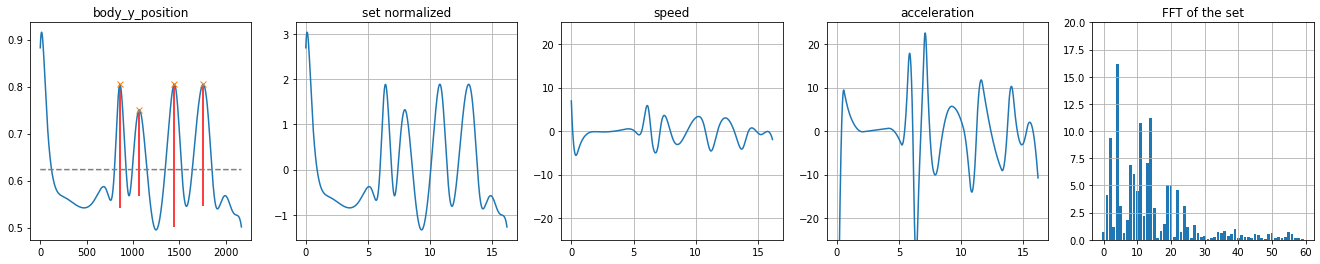

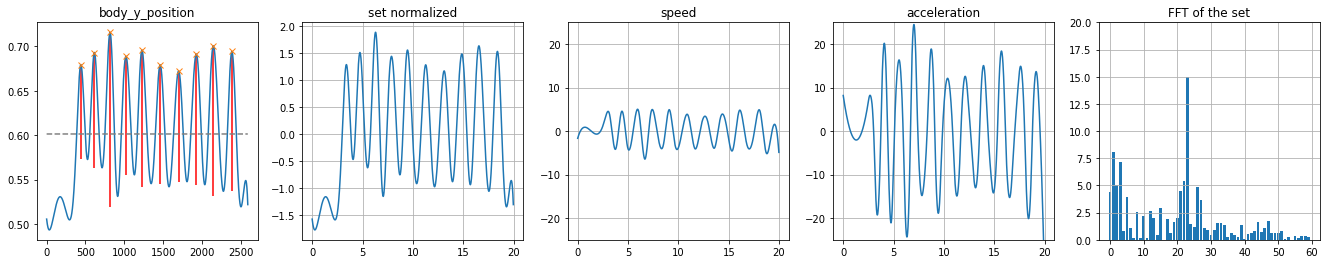

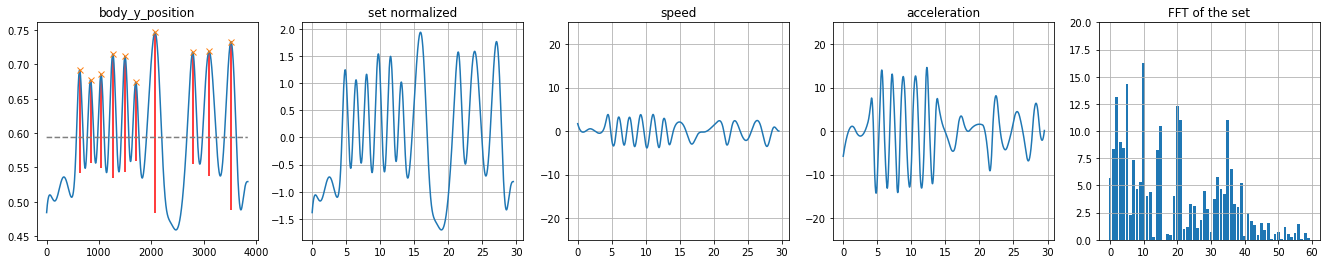

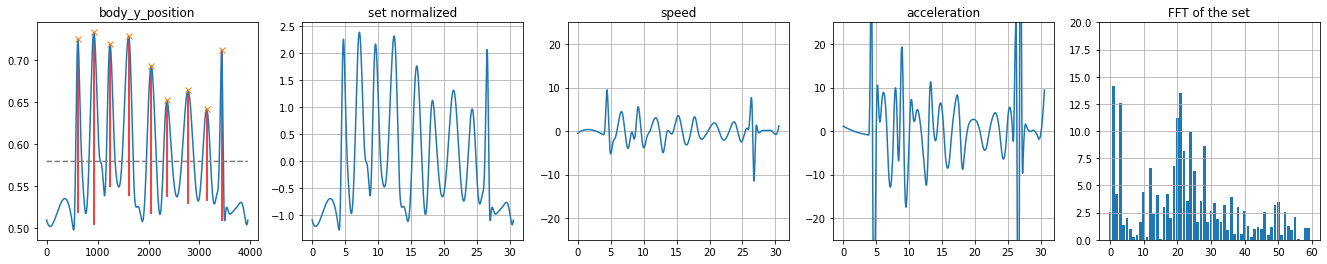

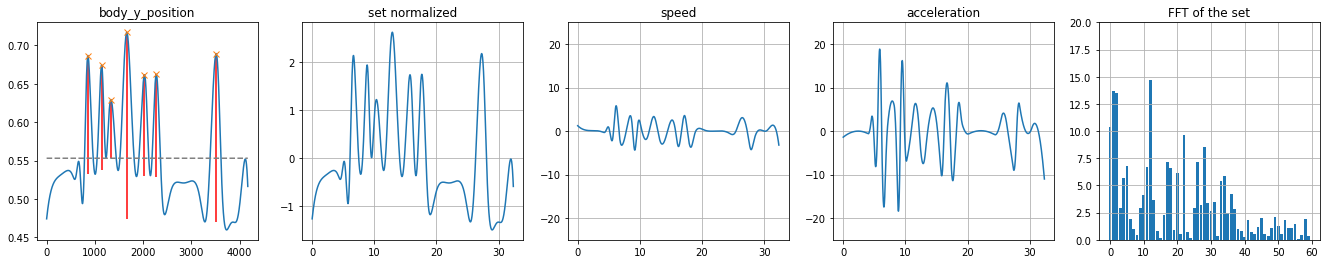

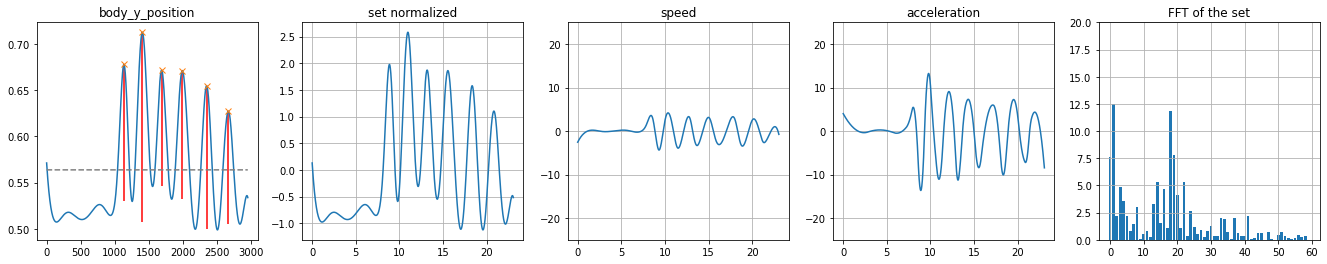

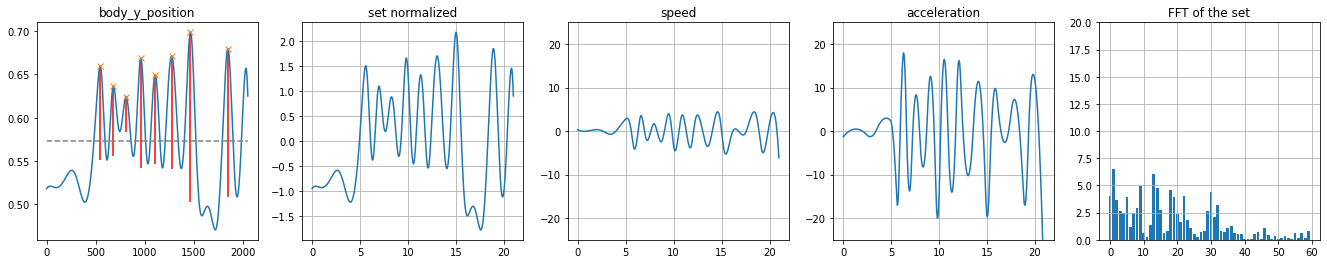

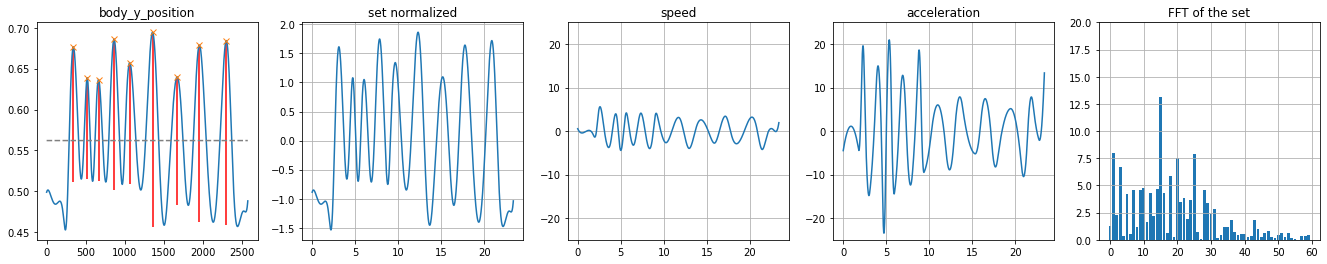

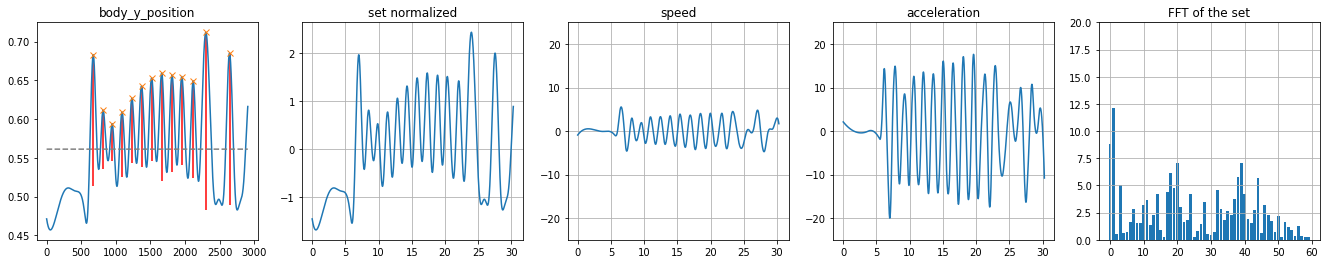

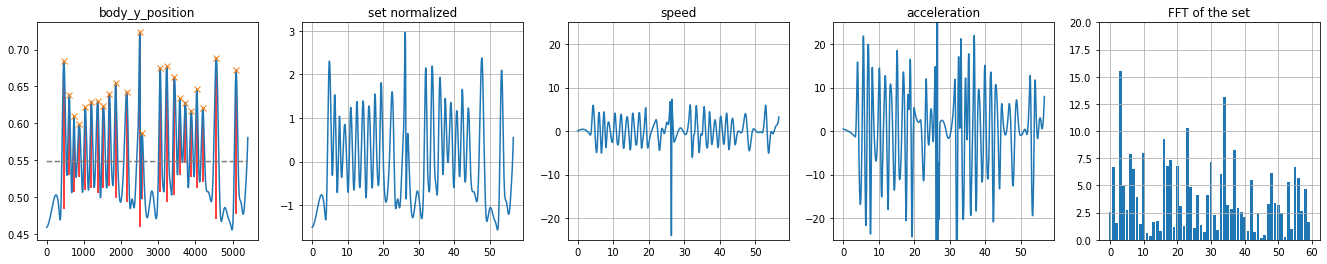

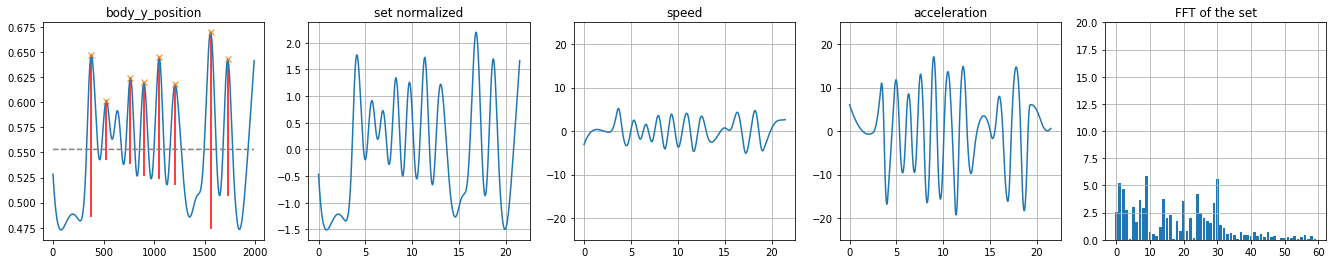

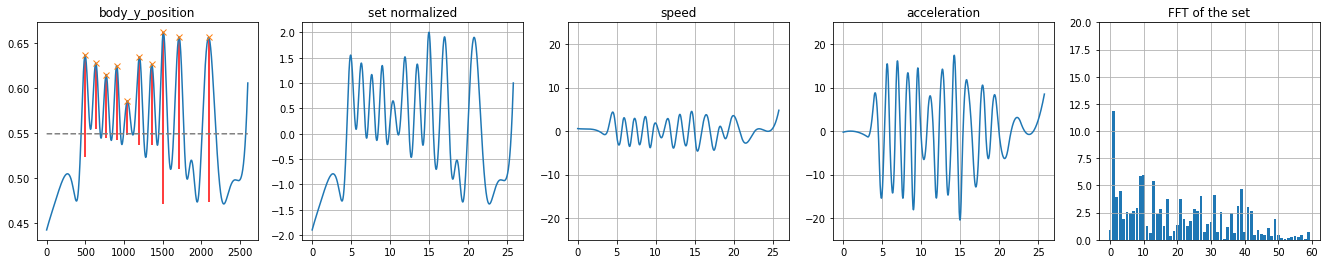

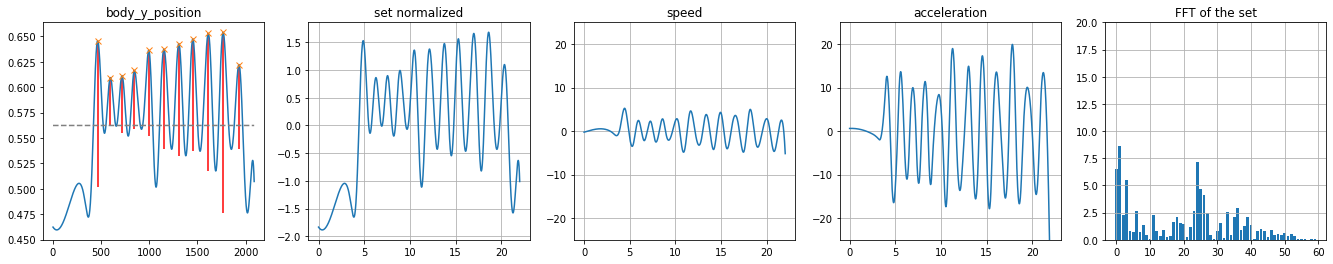

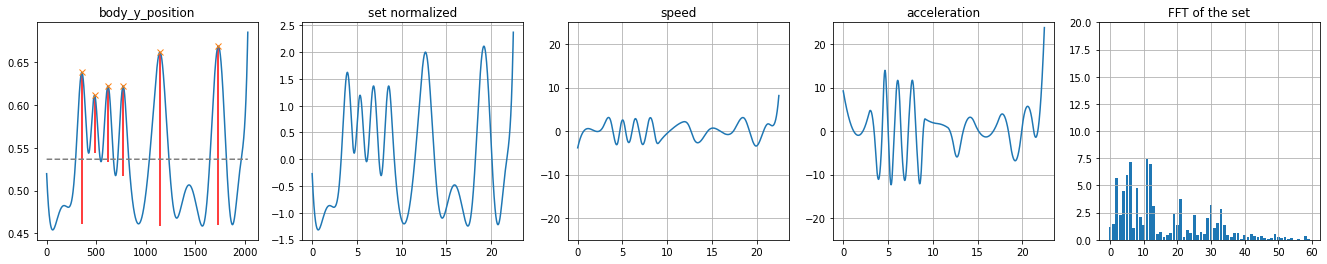

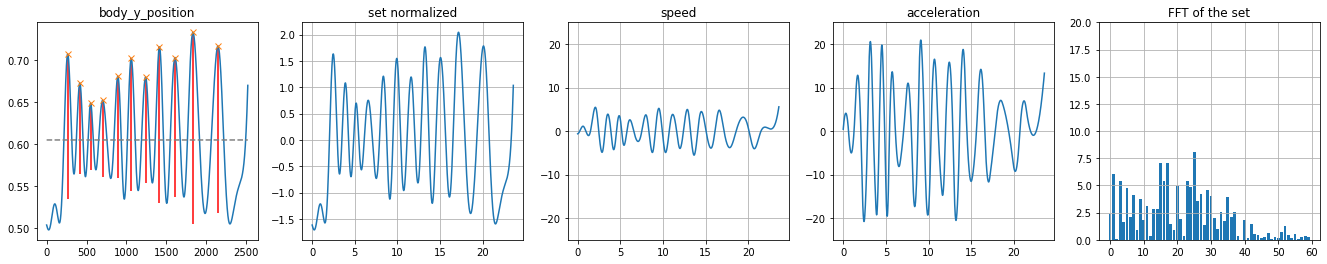

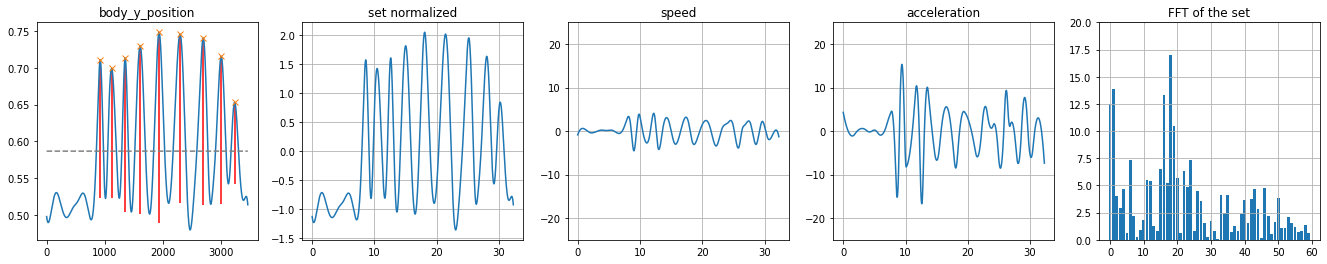

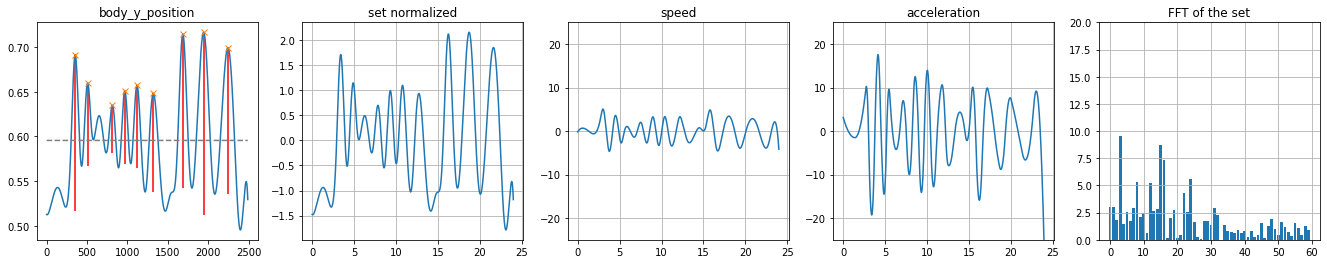

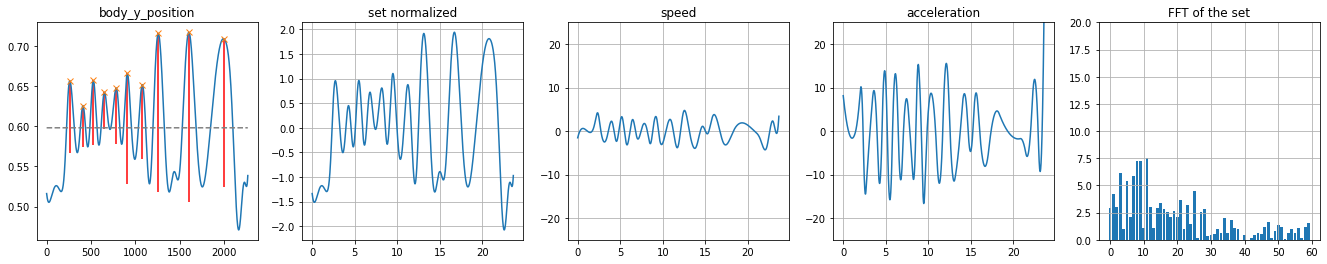

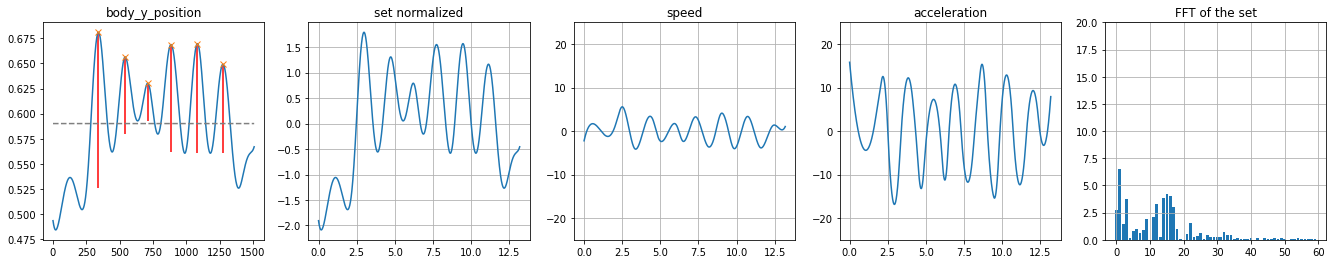

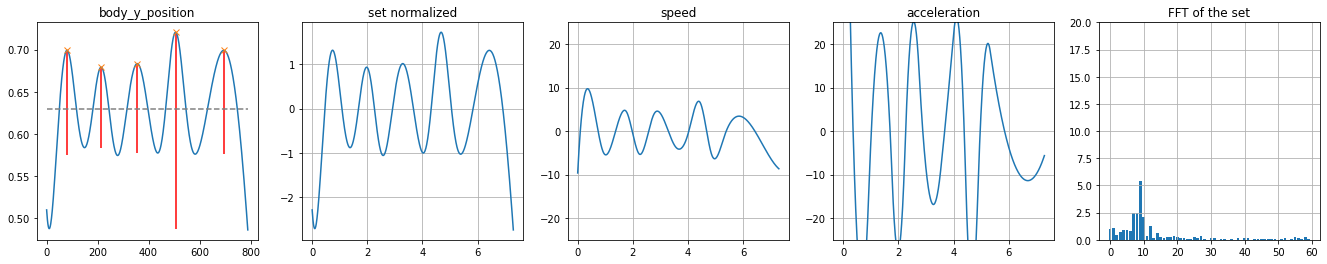

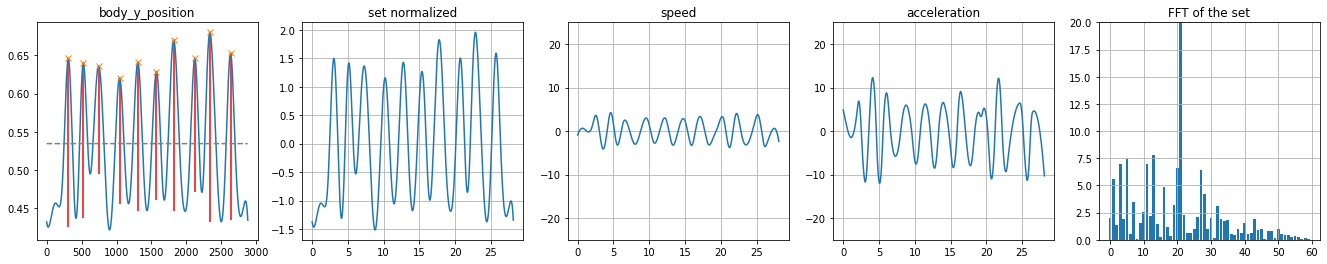

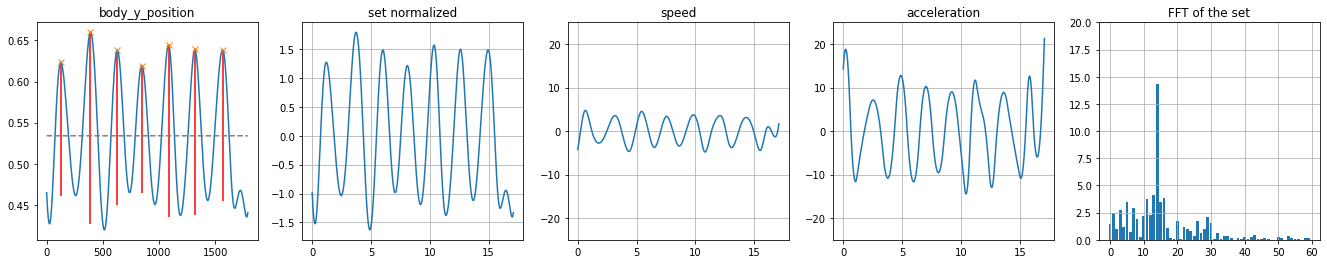

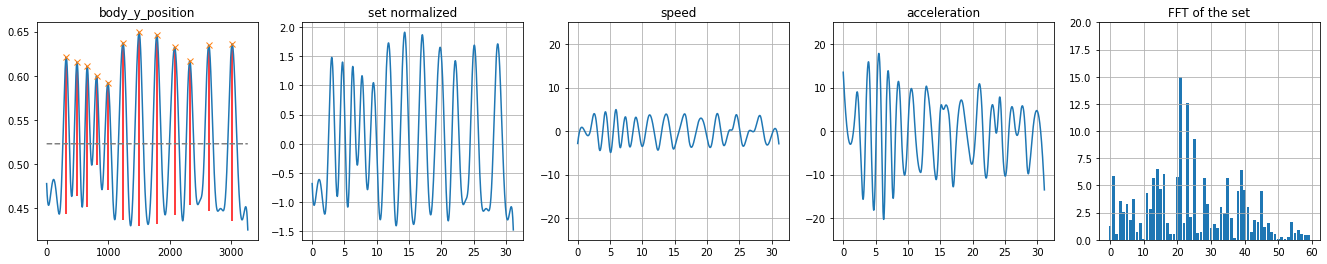

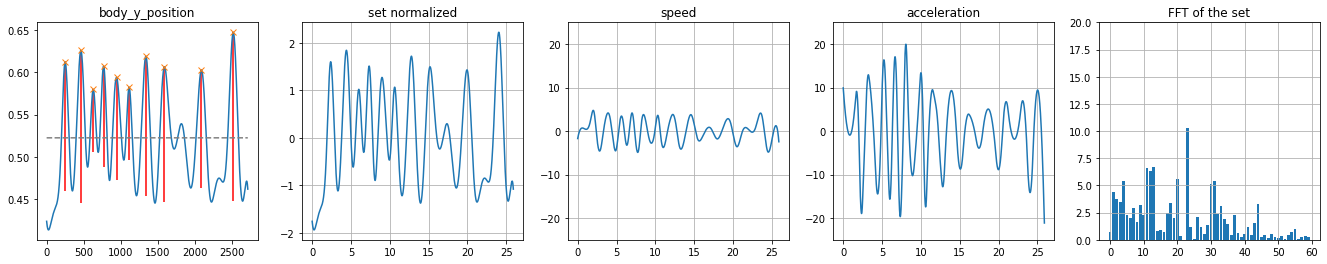

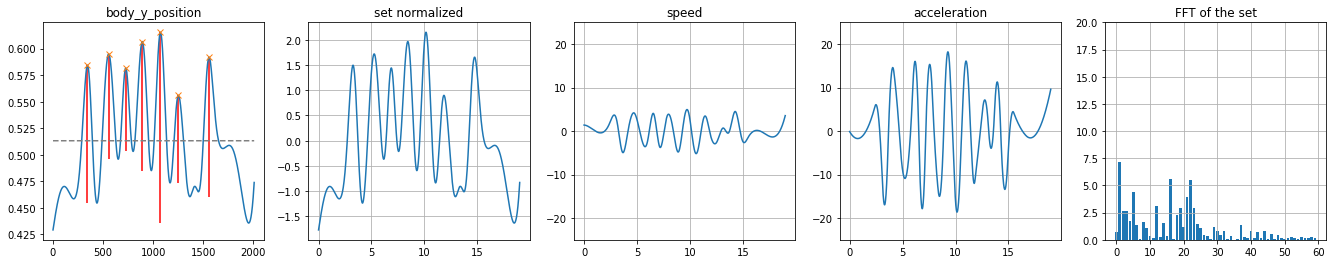

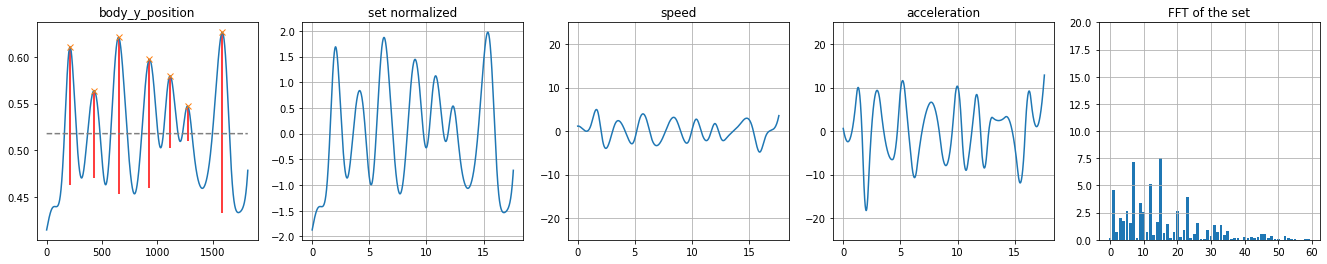

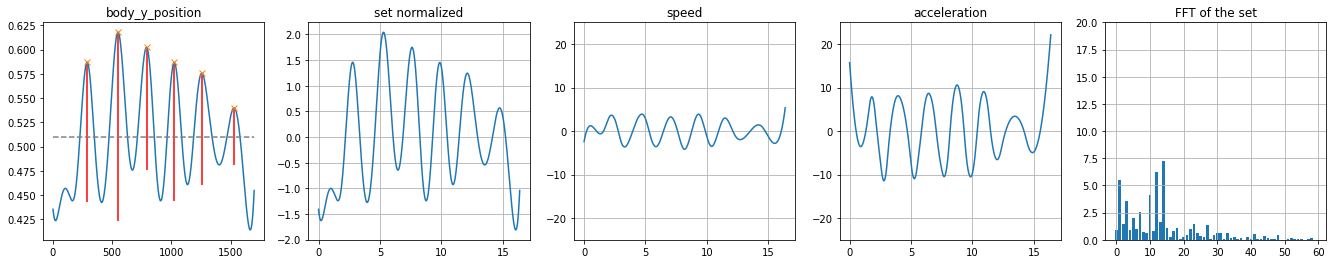

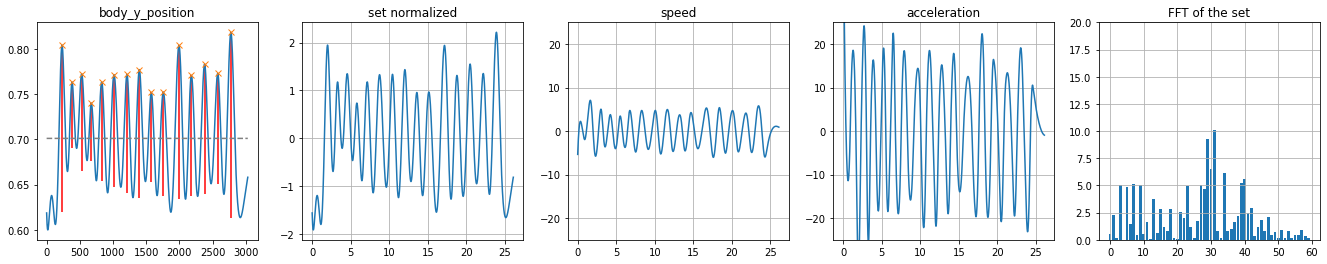

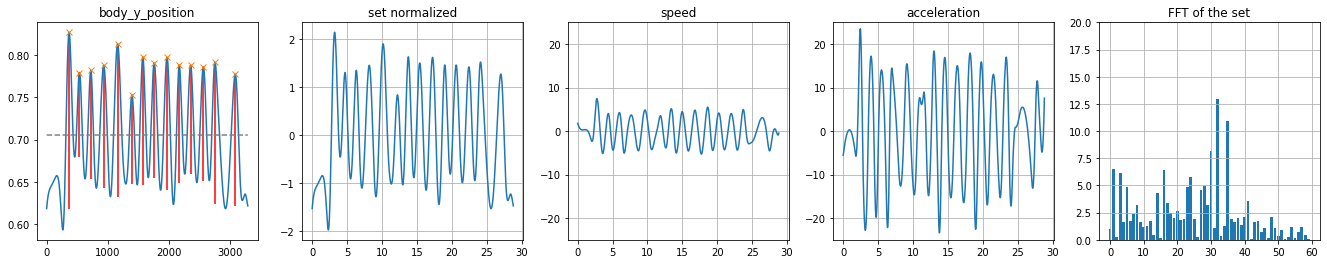

D:\Users\alexa\anaconda3\envs\pytorch\lib\site-packages\numpy\core\fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Users\alexa\anaconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Users\alexa\anaconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
D:\Users\alexa\anaconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
D:\Users\alexa\anaconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


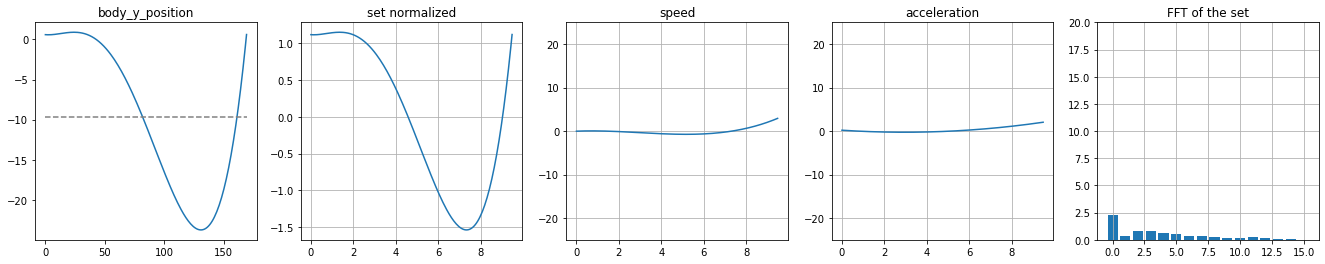

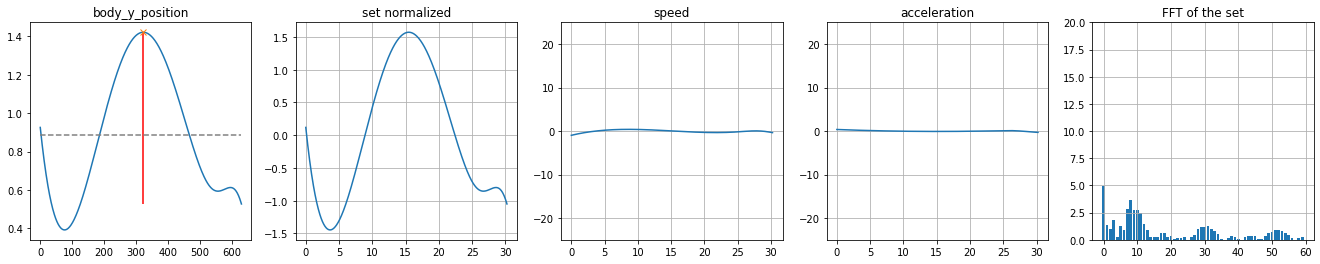

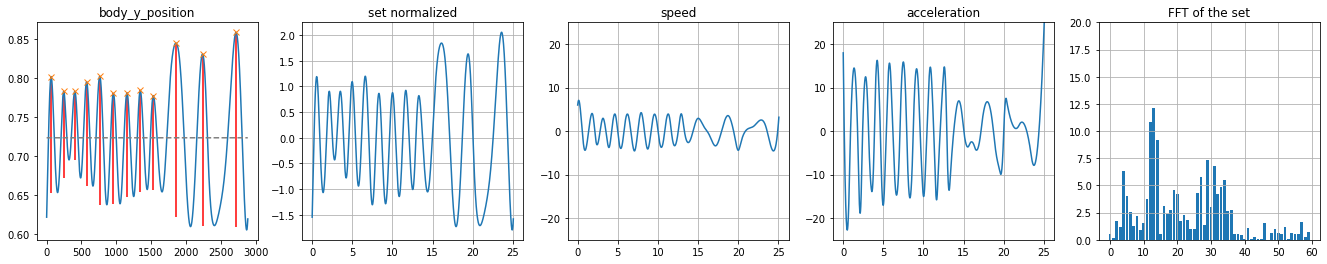

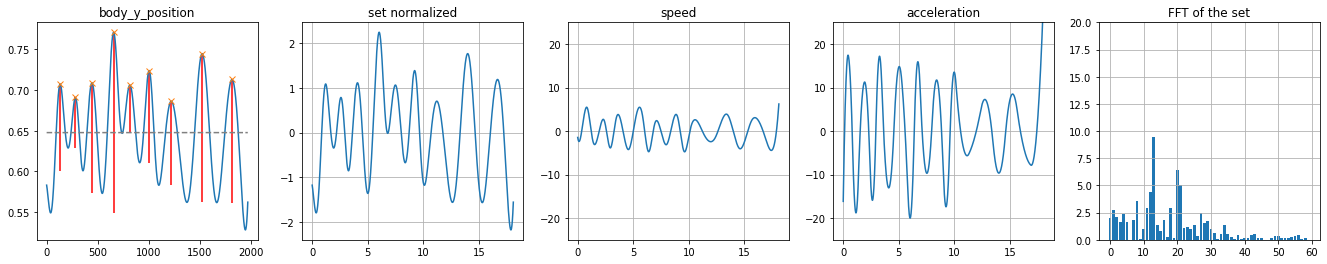

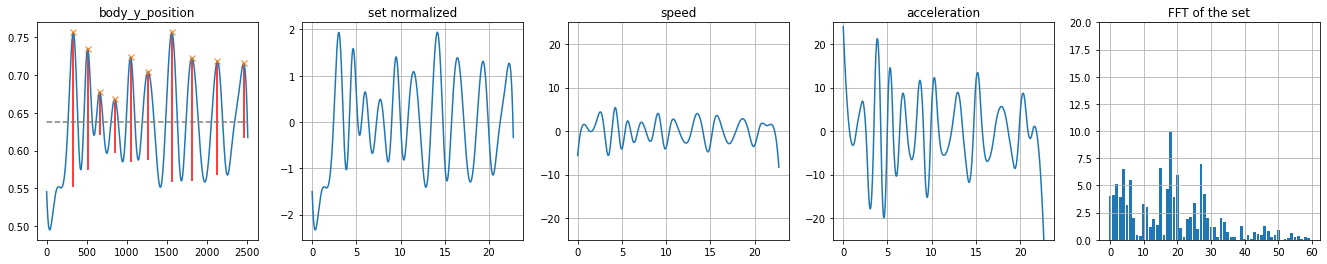

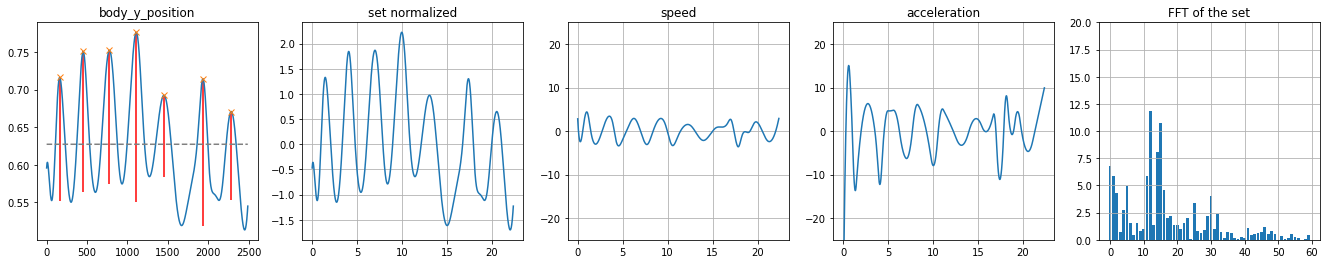

In [13]:
fft_data = []
other_data = []
from scipy.fft import dct, idct, dst, idst
from scipy.interpolate import UnivariateSpline   
from scipy.signal import find_peaks

for session in df.session.unique():
    if session > -1:
        my_df = pd.merge(df[df.session == session], sets_df, on=["session","session_time"])
        
        for wset in my_df.workout_set.unique()[1:]:
            plt.figure(figsize=(23,4))
            
            # ax = plt.subplot(141)
            # sns.color_palette('bright')
            # sns.lineplot(data=my_df[my_df.workout_set == wset], x='session_time', y='body_y_landmark')#, hue='workout_set')
            # plt.grid(True)
            
            # plt.subplot(132)
            # #plt.show()
            # #plt.figure(figsize=(30,6))
            ft = dct(my_df[my_df.workout_set ==wset].body_y_landmark.tolist())
            # N=len(ft)
            # window = np.zeros(N)
            # window[10:61] = 1
            # plt.plot(idct(ft * window))
                       
            y = np.array(my_df[my_df.workout_set == wset].body_y_landmark.tolist())
            t = np.array(my_df[my_df.workout_set == wset].session_time.tolist()) 
            t = t - t[0]
            ts = np.linspace(t[0], t[-1], len(t)*10)
            spl = UnivariateSpline(t, y, k=4, s = 0.04)  
            x = spl(ts)
            peaks, properties = find_peaks(x, height=np.mean(x), distance=50, prominence=0.03, width=40)
            prominences = properties["prominences"]
            contour_heights = x[peaks] - prominences           
            n_rep = len(peaks)
            
            set_duration = t[-1]
            mean_amplitude = np.mean(prominences)
            std_amplitude = np.std(prominences)
            
            ax = plt.subplot(151)
            plt.plot(x)
            plt.plot(peaks, x[peaks], "x")
            plt.plot(np.ones_like(x) * np.mean(x), "--", color="gray")            
            plt.vlines(x=peaks, ymin=contour_heights, ymax=x[peaks], color='red')
            plt.title("body_y_position")
            
            plt.subplot(152) 
            plt.plot(ts, (spl(ts) - np.mean(x)) / np.std(x))  # spl.derivative(1)(ts))
            plt.grid(True)
            plt.title("set normalized")
            #plt.ylim((-1,1))
            
            plt.subplot(153) 
            plt.plot(ts,spl.derivative(1)(ts) / np.std(x))
            plt.grid(True)
            plt.title("speed")
            plt.ylim((-25,25))
            
            plt.subplot(154) 
            plt.plot(ts,spl.derivative(2)(ts) / np.std(x))
            plt.grid(True)
            plt.title("acceleration")
            plt.ylim((-25,25))
            
            plt.subplot(155)
            ft_filtered = ft[1:61]
            plt.bar([i for i in range(len(ft_filtered))], np.abs(ft_filtered))
            plt.grid(True)
            plt.title("FFT of the set")
            plt.ylim((0,20))
            plt.show()
            fft_data.append(np.array(ft_filtered))
            other_data.append({"session":session,
                               "workout_set": wset,
                               "number_of_repetitions": n_rep,
                               "set_duration": set_duration,
                               "mean_of_amplitude": mean_amplitude,
                               "std_of_amplitude": std_amplitude})

In [14]:
print(len(fft_data))
other_data = [other_data[i] for i in range(len(fft_data)) if len(fft_data[i]) == 60]
fft_data = [data for data in fft_data if len(data) == 60]

fft_data = [fft_data[i] for i in range(len(other_data)) if other_data[i]["number_of_repetitions"] > 0]
other_data = [data for data in other_data if data["number_of_repetitions"] > 0]

fft_data = [fft_data[i] for i in range(len(other_data)) if other_data[i]["mean_of_amplitude"] < 0.6]
other_data = [data for data in other_data if data["mean_of_amplitude"] < 0.6]

fft_data = [fft_data[i] for i in range(len(other_data)) if other_data[i]["std_of_amplitude"] > 0.0]
other_data = [data for data in other_data if data["std_of_amplitude"] > 0.0]
print(len(fft_data))
fft_data = np.stack(fft_data)

35
33


In [15]:
other_data = pd.DataFrame(other_data)
other_data.fillna(0, inplace=True)
other_data['workout_set'] = other_data.groupby("session")["workout_set"].rank("dense", ascending=True) - 1
other_data.head()

session  workout_set  number_of_repetitions  set_duration  \
0        0          0.0                      4     16.171750   
1        0          1.0                     10     19.974582   
2        0          2.0                     10     29.536008   
3        0          3.0                      9     30.515390   
4        0          4.0                      7     32.360449   

   mean_of_amplitude  std_of_amplitude  
0           0.252274          0.043553  
1           0.145268          0.024189  
2           0.172441          0.046129  
3           0.170849          0.040007  
4           0.156251          0.052720

In [16]:
other_data[other_data.number_of_repetitions==1]

Empty DataFrame
Columns: [session, workout_set, number_of_repetitions, set_duration, mean_of_amplitude, std_of_amplitude]
Index: []

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
xpca = pca.fit_transform(fft_data)
print(pca.explained_variance_ratio_)

[1.41162972e-01 1.11470853e-01 1.01614699e-01 8.69875709e-02
 7.77746192e-02 6.29732346e-02 6.09082159e-02 5.20209284e-02
 4.13980271e-02 3.44855740e-02 3.04665248e-02 2.59945800e-02
 2.38424791e-02 2.21628751e-02 1.90384251e-02 1.73986558e-02
 1.52127297e-02 1.29305349e-02 1.23517247e-02 1.05269732e-02
 9.51710943e-03 6.41603670e-03 4.99684852e-03 4.75708443e-03
 4.12454777e-03 3.68073301e-03 2.16537341e-03 1.25649839e-03
 8.62923492e-04 6.67042364e-04 5.58146480e-04 2.75458630e-04
 2.78394875e-32]


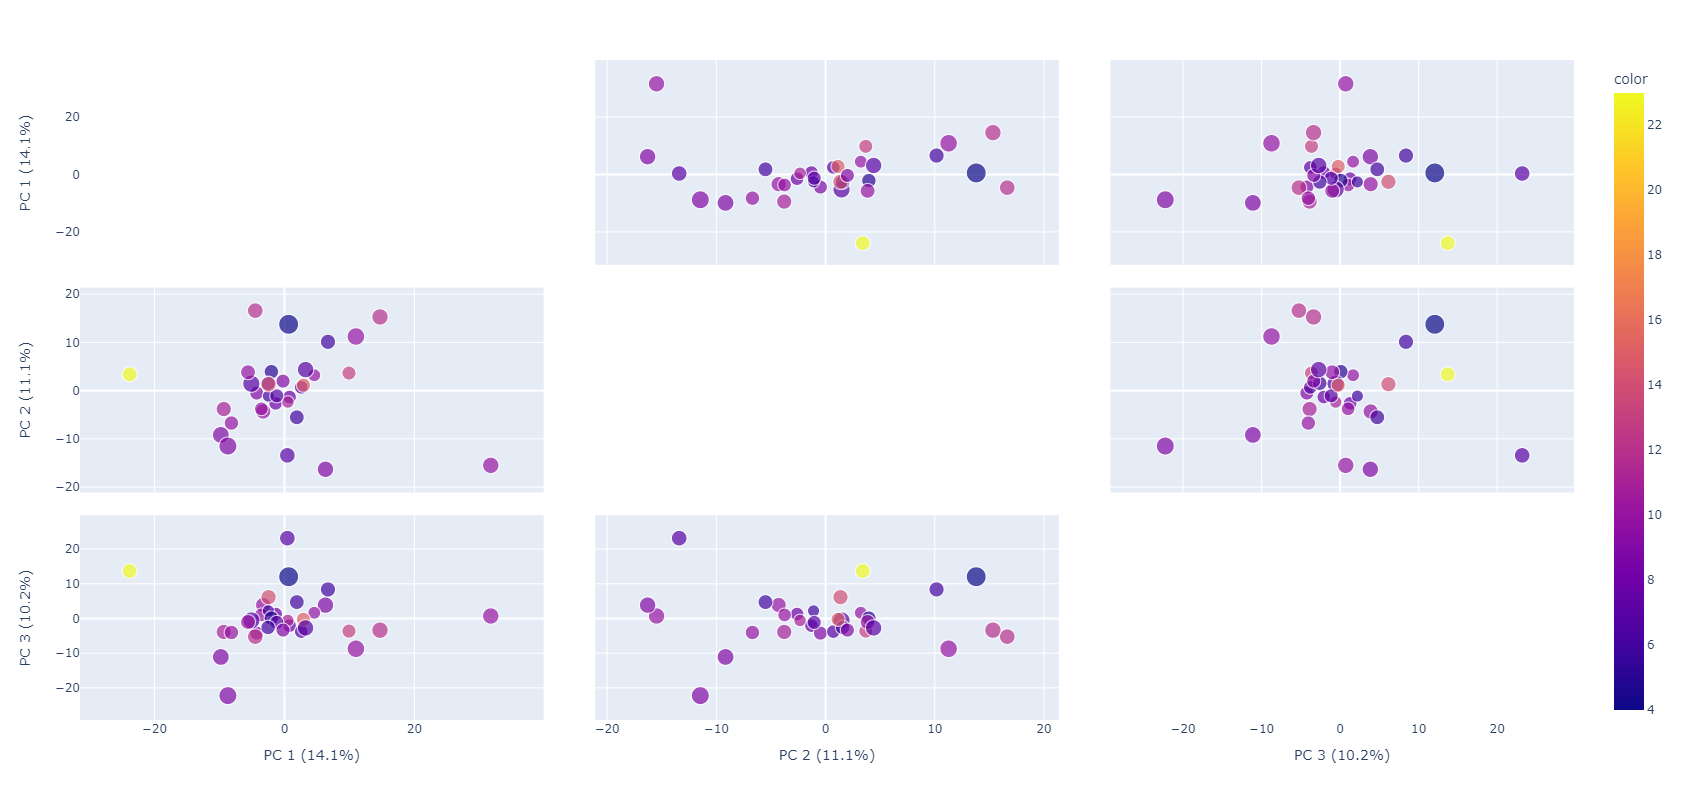

In [18]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    xpca,
    color=other_data.number_of_repetitions,
    size=other_data.mean_of_amplitude,
    labels=labels,
    dimensions=range(3)
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.show()

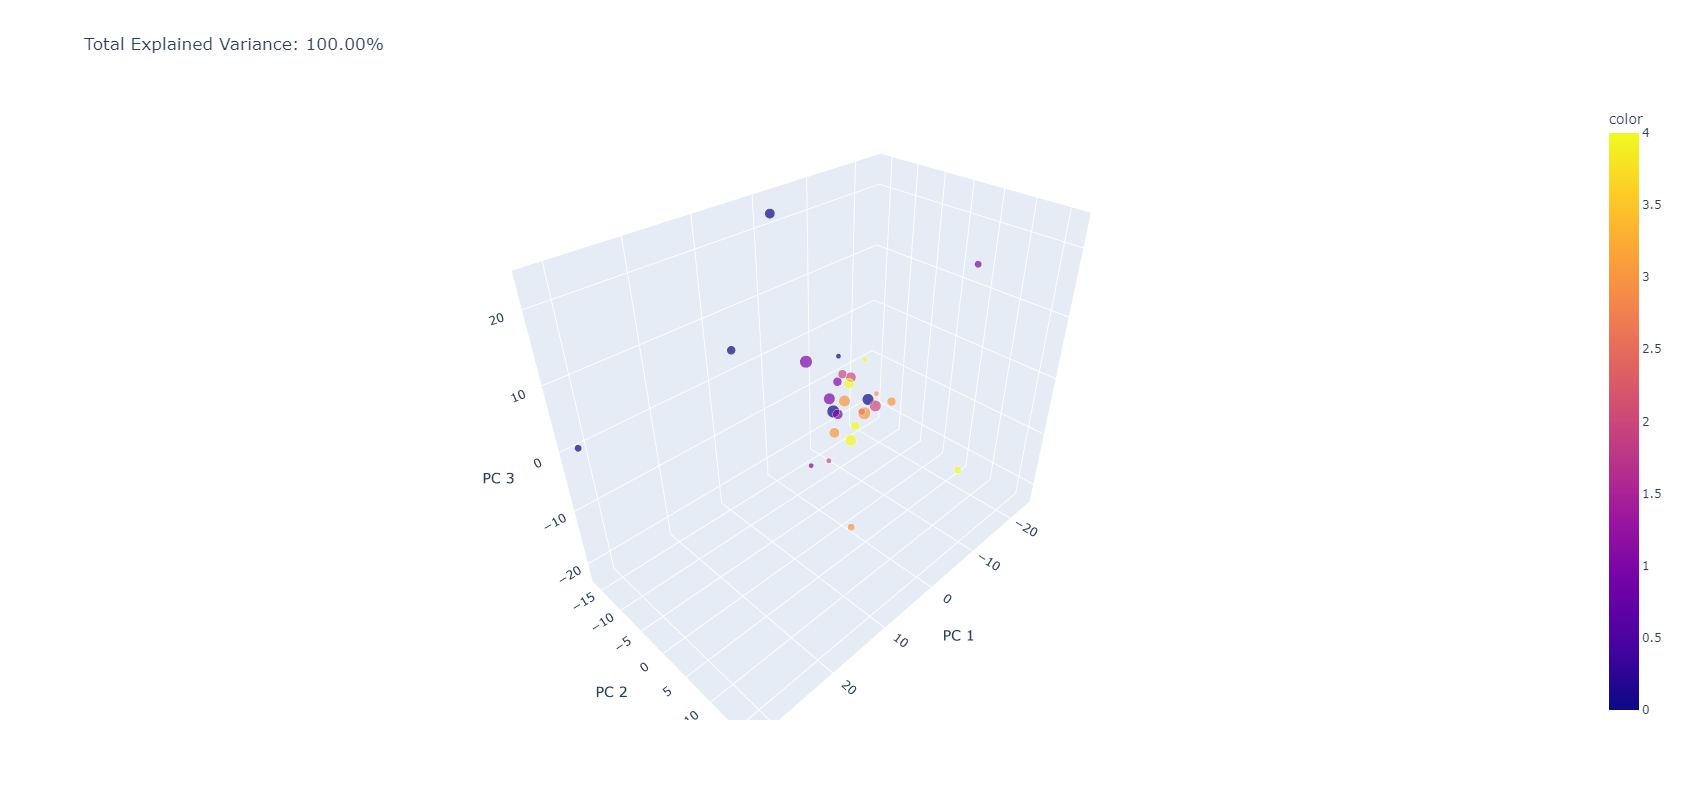

In [19]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    xpca, x=0, y=1, z=2, color=np.array(other_data)[:,0],
    size=np.array(other_data)[:,1],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.show()

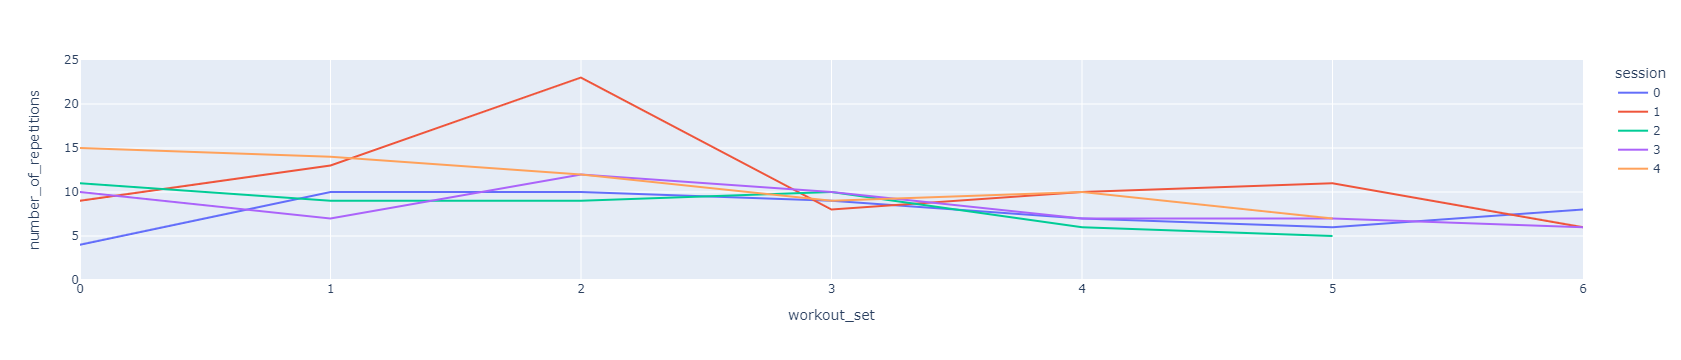

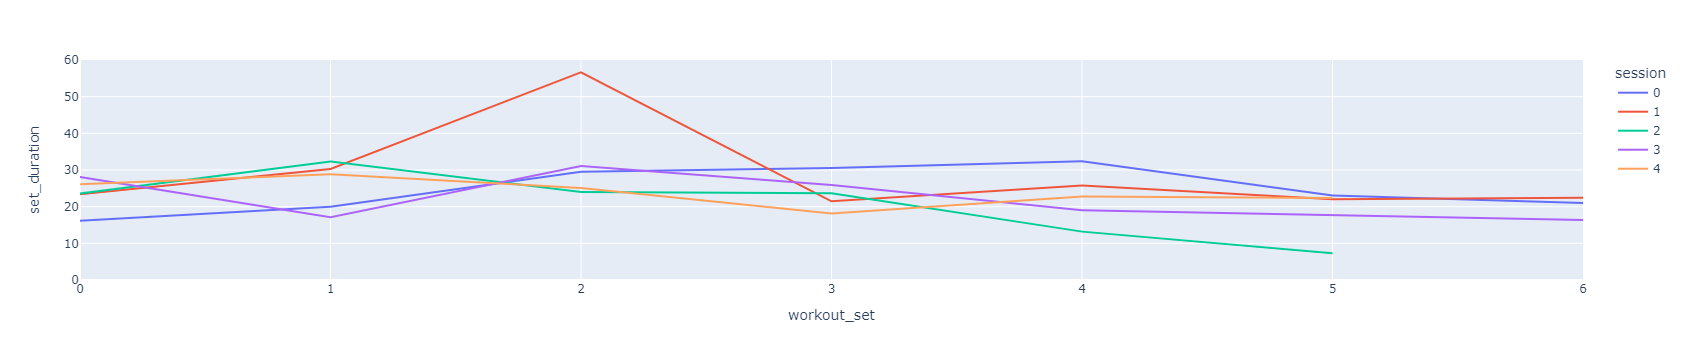

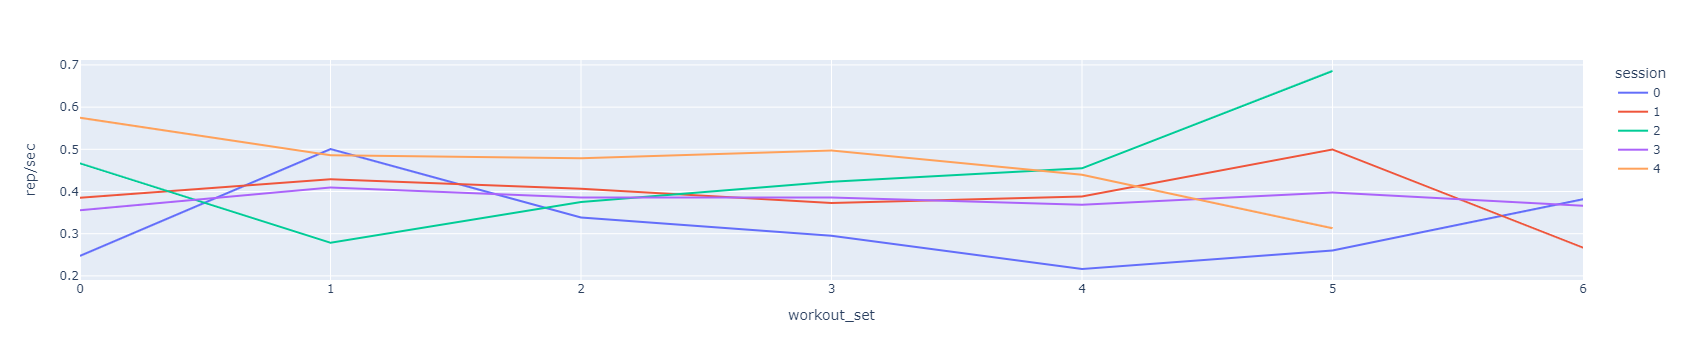

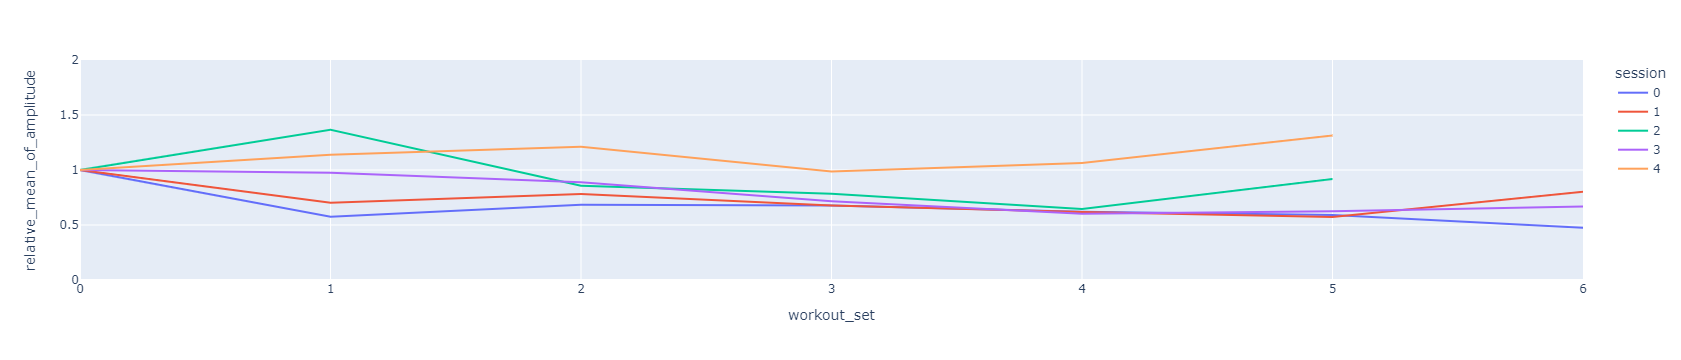

In [32]:
sessions_df = other_data.copy()
fig = px.line(sessions_df, x="workout_set", y="number_of_repetitions", color='session')
fig.update_layout(yaxis_range=[0,25])
fig.show()
sessions_df = other_data.copy()
fig = px.line(sessions_df, x="workout_set", y="set_duration", color='session')
fig.update_layout(yaxis_range=[0,60])
fig.show()
sessions_df = other_data.copy()
sessions_df["rep/sec"] = sessions_df.number_of_repetitions / sessions_df.set_duration
fig = px.line(sessions_df, x="workout_set", y="rep/sec", color='session')
fig.show()
sessions_df = other_data.copy()
df2 = sessions_df.groupby("session").first().reset_index(drop=True)["mean_of_amplitude"].rename("first_mean_of_amplitude")
sessions_df = pd.merge(sessions_df, df2, right_index=True, left_on='session', how='outer') 
sessions_df["relative_mean_of_amplitude"] = sessions_df["mean_of_amplitude"] / sessions_df["first_mean_of_amplitude"]
fig = px.line(sessions_df, x="workout_set", y="relative_mean_of_amplitude", color='session')
fig.update_layout(yaxis_range=[0,2])
fig.show()

In [22]:
df2

0    0.252274
1    0.175955
2    0.148546
3    0.195485
4    0.128065
Name: first_mean_of_amplitude, dtype: float64